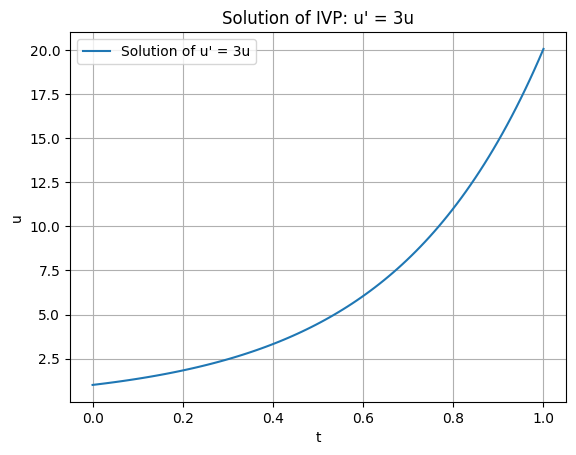

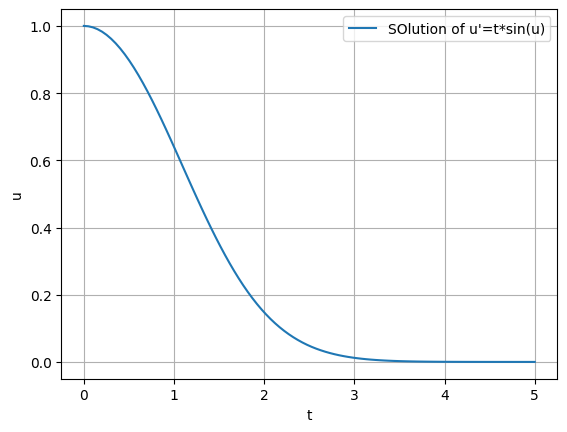

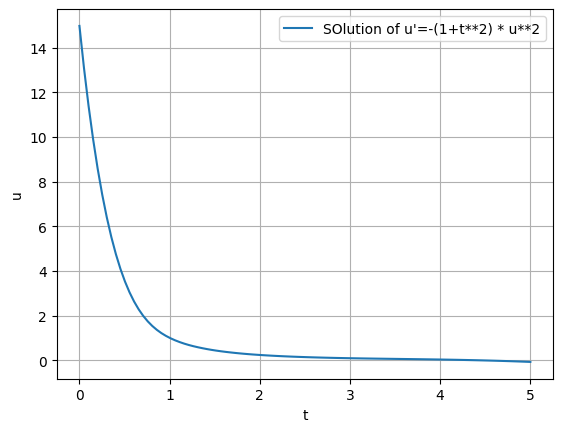

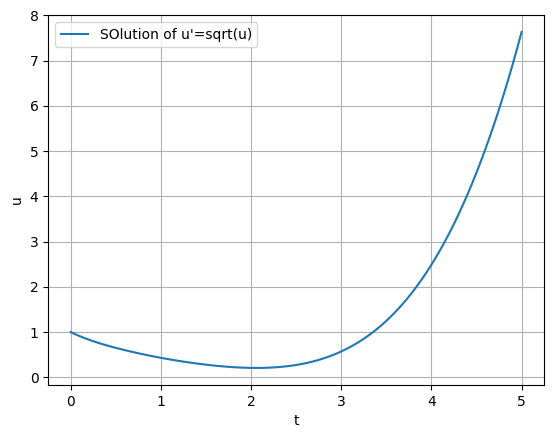

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp


# a
# ODE方程
def ODE_fun(t, u):
    return 3 * u


# 假设u0 = 1
u0_1 = 1
# 时间区间
t1 = (0, 1)
# 求解IVP
sol_1 = solve_ivp(ODE_fun, t1, [u0_1], dense_output=True)
t_eval_1 = np.linspace(t1[0], t1[1], 100)
# 获取解
u_eval_1 = sol_1.sol(t_eval_1)[0]

# 绘图
plt.plot(t_eval_1, u_eval_1, label="Solution of u' = 3u")
plt.xlabel("t")
plt.ylabel("u")
plt.title("Solution of IVP: u' = 3u")
plt.grid(True)
plt.legend()
plt.show()


# b
def ODE_fun2(t, u):
    return -t * np.sin(u)


u0 = 1
# 时间区间
t = (0, 5)
# 求解
sol_2 = solve_ivp(ODE_fun2, t, [u0], dense_output=True)
t_eval_2 = np.linspace(t[0], t[1], 100)
u_eval_2 = sol_2.sol(t_eval_2)[0]
# 绘图
plt.plot(t_eval_2, u_eval_2, label="SOlution of u'=t*sin(u)")
plt.xlabel("t")
plt.ylabel("u")
plt.legend()
plt.grid(True)
plt.show()


# c
def ODE_fun3(t, u):
    return -(1 + t**2) * u**2


u0 = 1
t3 = (1, 3)
sol_3 = solve_ivp(ODE_fun3, t3, [u0], dense_output=True)
t_eval_3 = np.linspace(t[0], t[1], 100)
u_eval_3 = sol_3.sol(t_eval_3)[0]
# 绘图
plt.plot(t_eval_3, u_eval_3, label="SOlution of u'=-(1+t**2) * u**2")
plt.xlabel("t")
plt.ylabel("u")
plt.legend()
plt.grid(True)
plt.show()


# d
def ODE_fun4(t, u):
    return np.sqrt(u)


u0 = 1
t4 = (0, 1)
sol_4 = solve_ivp(ODE_fun3, t4, [u0], dense_output=True)
t_eval_4 = np.linspace(t[0], t[1], 100)
u_eval_4 = sol_4.sol(t_eval_3)[0]
# 绘图
plt.plot(t_eval_4, u_eval_4, label="SOlution of u'=sqrt(u)")
plt.xlabel("t")
plt.ylabel("u")
plt.legend()
plt.grid(True)
plt.show()


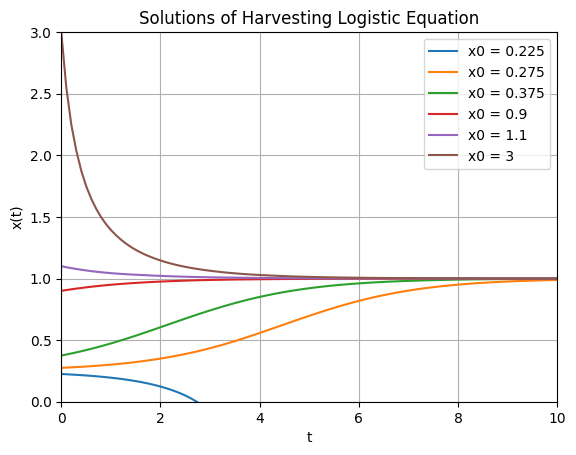

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# 参数
k = 1
S = 1
M = 0.25


# 定义ODE
def logistic_harvesting(t, x):
    return k * (S - x) * (x - M)


# 初始条件列表
x0 = [0.9 * M, 1.1 * M, 1.5 * M, 0.9 * S, 1.1 * S, 3 * S]

# 时间区间
t = (0, 10)
# 生成用于绘图的时间点
t_eval = np.linspace(t[0], t[1], 100)

for x0 in x0:
    try:
        # 求解IVP
        sol = solve_ivp(logistic_harvesting, t, [x0], dense_output=True)
        x_eval = sol.sol(t_eval)[0]
        plt.plot(t_eval, x_eval, label=f"x0 = {x0}")
    except:
        # 捕获异常（如果有），仍然绘制可能部分的解
        t_warn, x_warn = [], []
        t = t[0]
        x = x0
        dt = 0.01
        while t < t[1]:
            try:
                x_next = x + dt * logistic_harvesting(t, x)
                t_warn.append(t)
                x_warn.append(x)
                x = x_next
                t += dt
            except:
                break
        plt.plot(t_warn, x_warn, label=f"x0 = {x0} (warning case)", linestyle="--")

plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Solutions of Harvesting Logistic Equation")
plt.legend()
plt.xlim(0, 10)
plt.ylim(0, 3)
plt.grid(True)
plt.show()


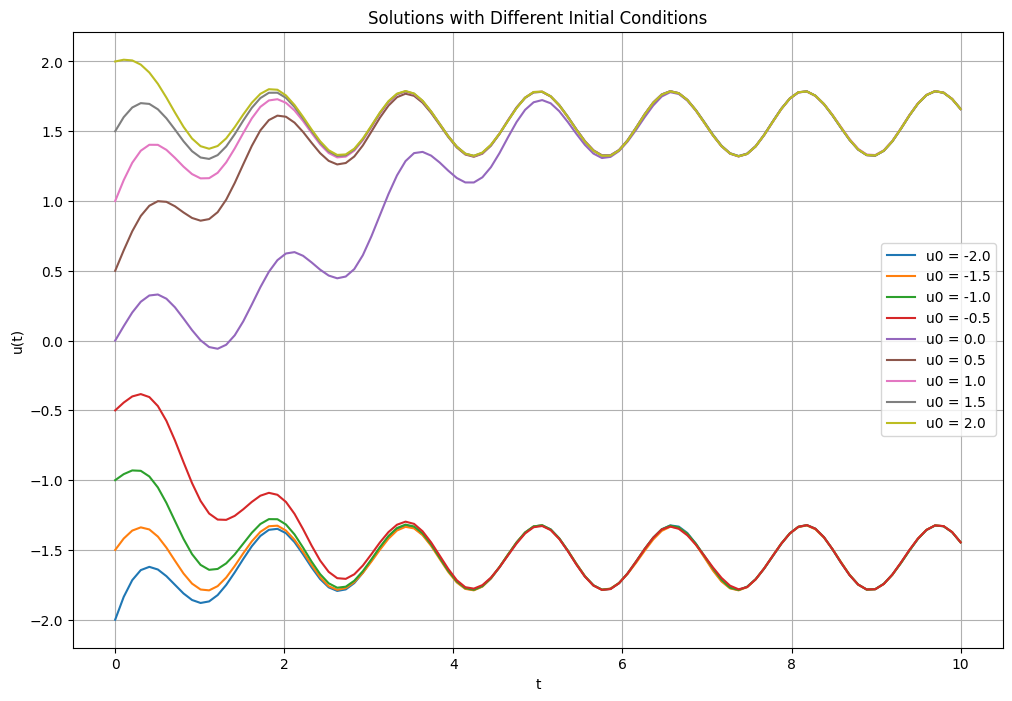

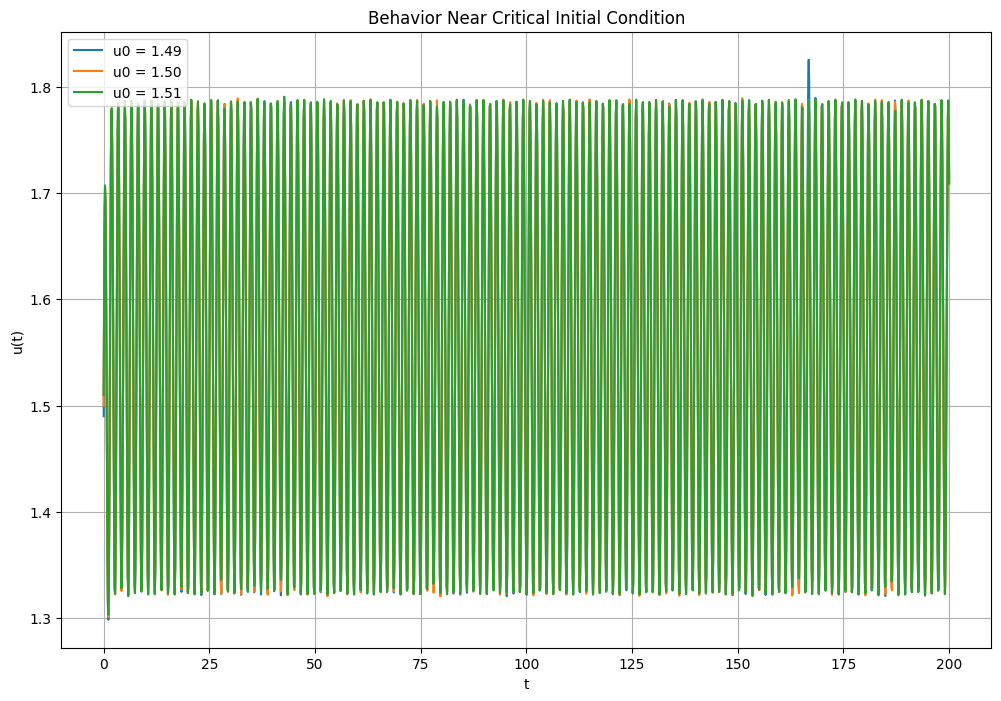

临界初始条件值: 1.50


In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp


# 定义ODE
def ode_func(t, u):
    return u * np.cos(u) + np.cos(4 * t)


# 时间区间
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 100)

# 测试多个初始条件
u0_values = np.arange(-2, 2.5, 0.5)

plt.figure(figsize=(12, 8))

for u0 in u0_values:
    sol = solve_ivp(ode_func, t_span, [u0], dense_output=True)
    u_eval = sol.sol(t_eval)[0]
    plt.plot(t_eval, u_eval, label=f"u0 = {u0}")

plt.xlabel("t")
plt.ylabel("u(t)")
plt.title("Solutions with Different Initial Conditions")
plt.legend()
plt.grid(True)
plt.show()

# 输入临界值
u0_critical = float(input("请输入观察到的临界初始条件值 (精确到两位小数): "))

# 验证临界值附近的行为
u0_close = [u0_critical - 0.01, u0_critical, u0_critical + 0.01]

plt.figure(figsize=(12, 8))

for u0 in u0_close:
    sol = solve_ivp(ode_func, (0, 200), [u0], dense_output=True)
    u_eval = sol.sol(np.linspace(0, 200, 2000))[0]
    plt.plot(np.linspace(0, 200, 2000), u_eval, label=f"u0 = {u0:.2f}")

plt.xlabel("t")
plt.ylabel("u(t)")
plt.title("Behavior Near Critical Initial Condition")
plt.legend()
plt.grid(True)
plt.show()

print(f"临界初始条件值: {u0_critical:.2f}")


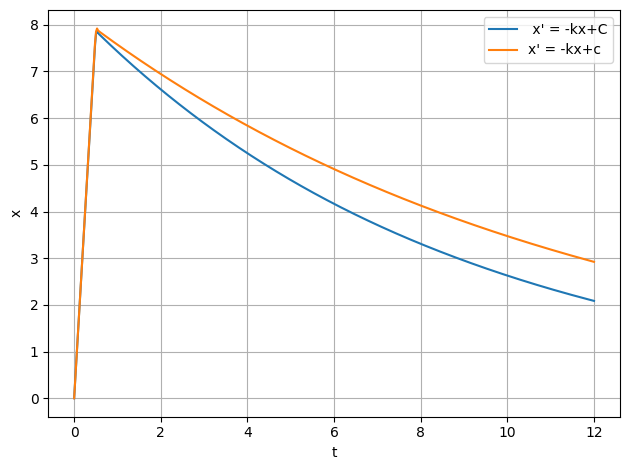

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# 参数
k = np.log(2) / 6


# 方程
def ODE_fun(t, x):
    if 0 <= t <= 0.5:
        C = 16
    elif t > 0.5:
        C = 0
    return -k * x + C


t = (0, 12)
t1 = np.linspace(0, 12, 500)
u0 = 0
# 求解
sol = solve_ivp(ODE_fun, t, [u0], dense_output=True)
x1 = sol.sol(t1)[0]


# 半衰期为8小时的
k = np.log(2) / 8
# 求解
sol = solve_ivp(ODE_fun, t, [u0], dense_output=True)
x2 = sol.sol(t1)[0]
# 绘图
# 半衰期6小时
plt.plot(t1, x1, label=" x' = -kx+C")
# 半衰期8小时
plt.plot(t1, x2, label="x' = -kx+c ")
plt.xlabel("t")
plt.ylabel("x")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


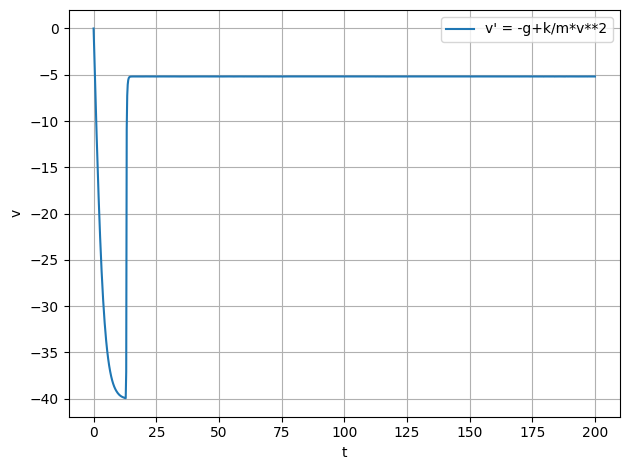

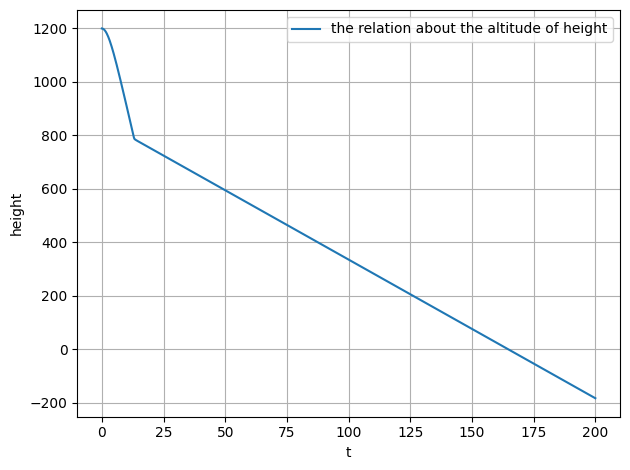

[150.0, 175.0, np.float64(164.74541885762628), np.float64(164.745379738019), np.float64(164.74537972392267), np.float64(164.74537972392267)]


In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.interpolate import CubicSpline

g = 9.8
m = 80
v0 = 0


def ODE_fun(t, v):
    if 0 <= t <= 13:
        k = 0.4875
    elif t > 13:
        k = 29.16
    return -g + k / m * v**2


t = (0, 200)
t1 = np.linspace(0, 200, 1000)

# 求解
sol = solve_ivp(ODE_fun, t, [v0], dense_output=True)
v = sol.sol(t1)[0]
# 绘图
plt.plot(t1, v, label="v' = -g+k/m*v**2")
plt.xlabel("t")
plt.ylabel("v")
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()


# (b)
def jifenhanshu(t, v):
    altitude = np.zeros_like(t)
    altitude[0] = 1200

    for i in range(1, len(t)):
        dt = t[i] - t[i - 1]
        # 平均速度
        average_v = -(v[i] + v[i - 1]) / 2
        # 高度减少量
        altitude[i] = altitude[i - 1] - average_v * dt

    return altitude


altitude = jifenhanshu(t1, v)
plt.plot(t1, altitude, label="the relation about the altitude of height")
plt.xlabel("t")
plt.ylabel("height")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


# c
def secant(
    f,
    x1,
    x2,
    maxiter=40,
    ftol=100 * np.finfo(float).eps,
    xtol=100 * np.finfo(float).eps,
):

    x = [float(x1), float(x2)]
    y1 = f(x1)
    dx, y2 = float("inf"), float("inf")
    k = 2

    while (abs(dx) > xtol) and (abs(y2) > ftol):
        y2 = f(x[k - 1])
        dx = -y2 * (x[k - 1] - x[k - 2]) / (y2 - y1)
        x.append(x[k - 1] + dx)

        k += 1
        y1 = y2  # 更新旧的函数值

        if k > maxiter:
            break

    return x


# 三次样条插值
def fun(t):
    y = CubicSpline(t1, altitude)
    return y(t)


x = secant(fun, 150, 175)
print(x)


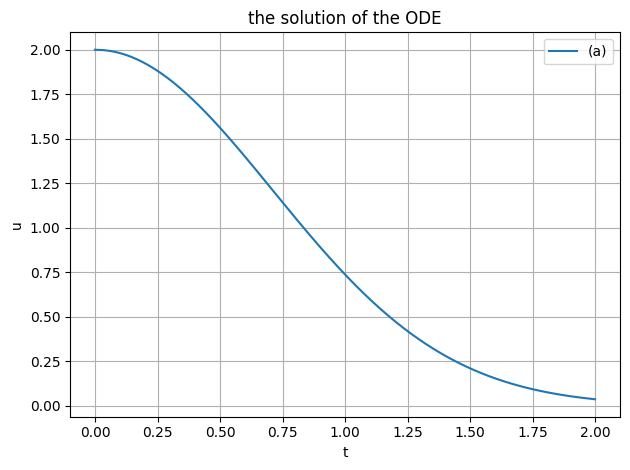

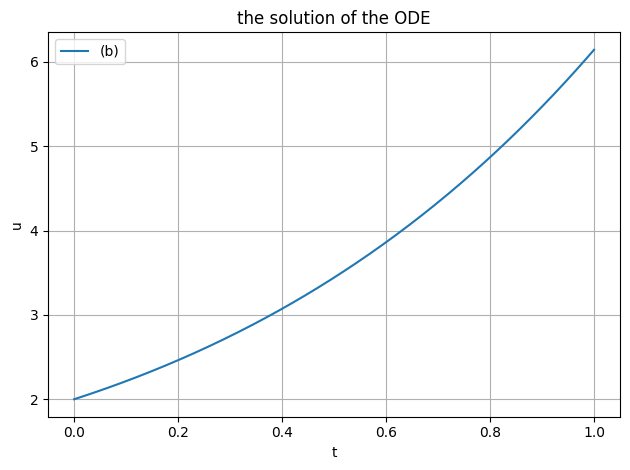

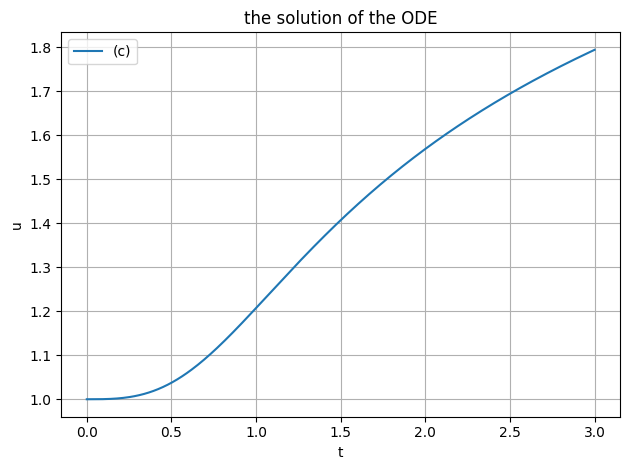

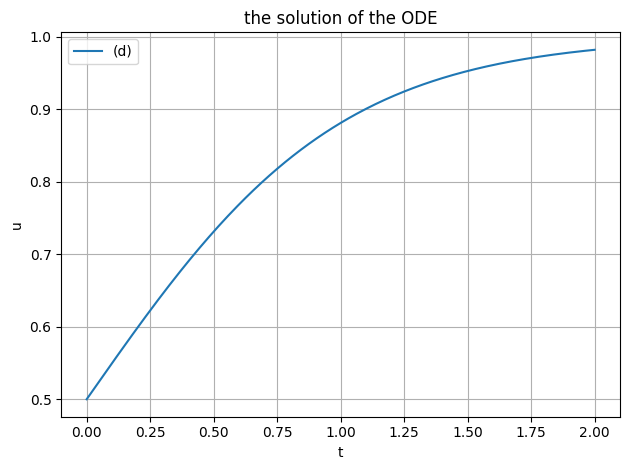

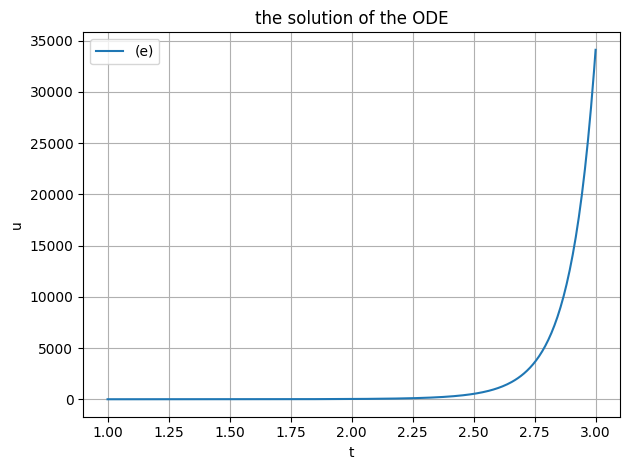

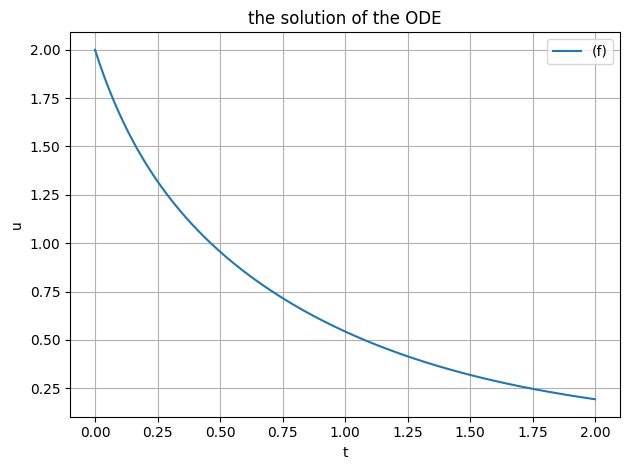

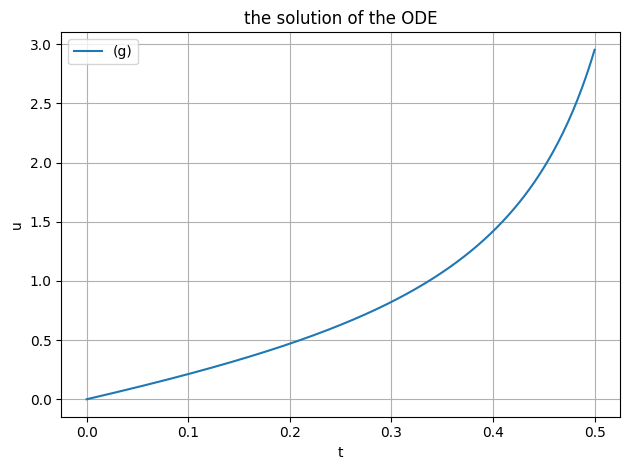

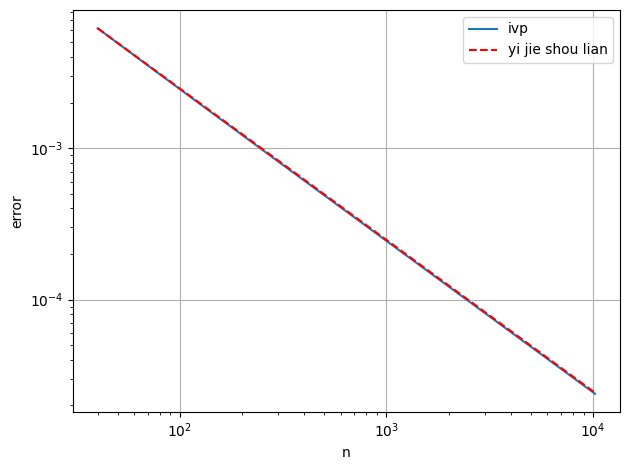

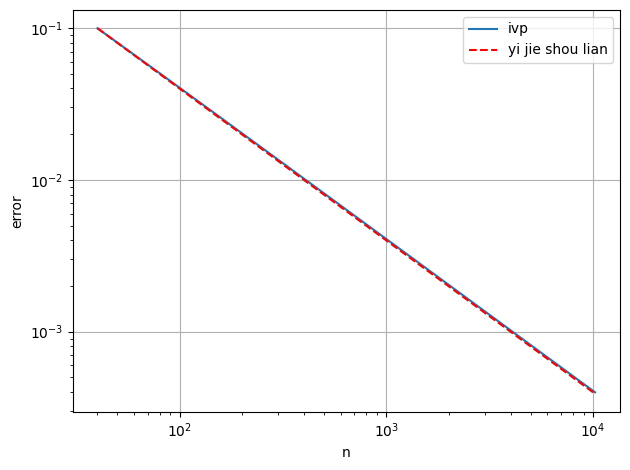

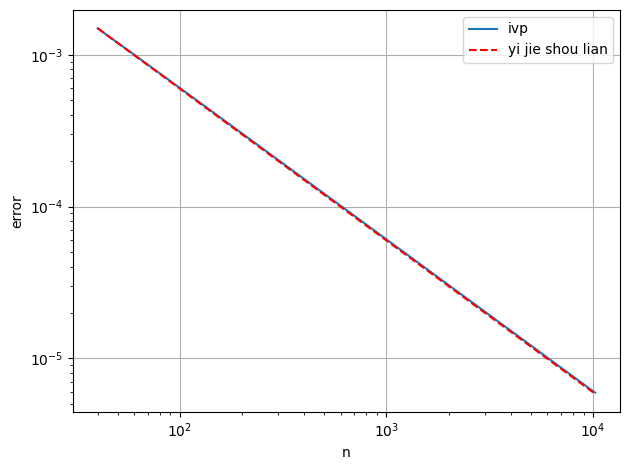

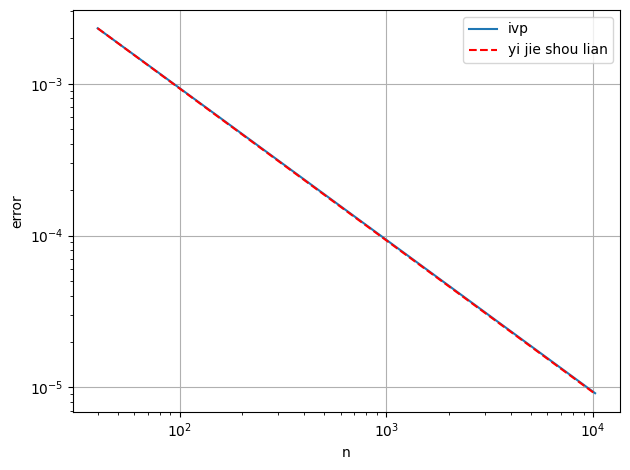

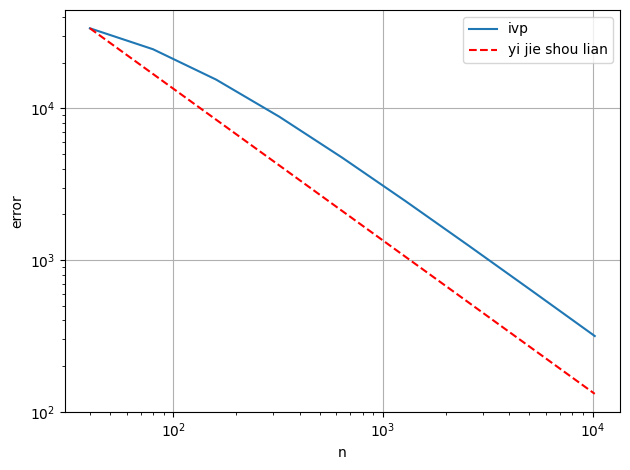

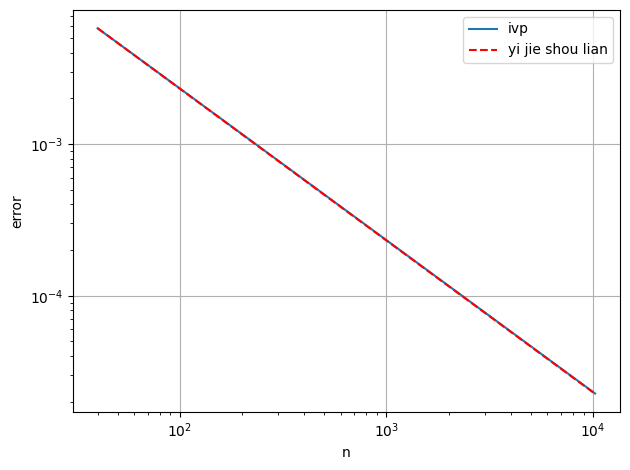

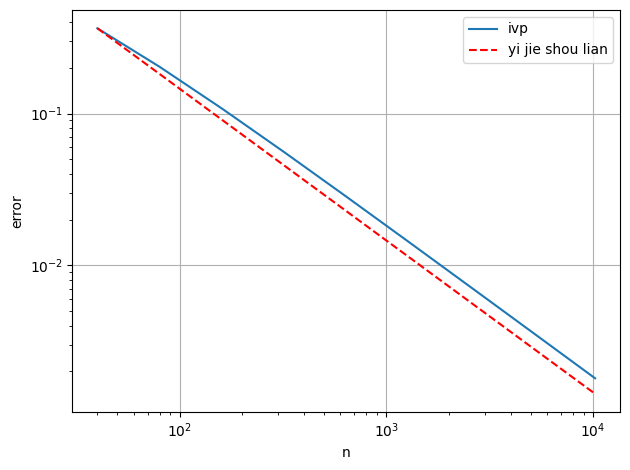

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# ivp
ivp_1 = {"tspan": (0, 2), "u0": 2, "f": lambda u, p, t: -2 * t * u}
ivp_2 = {"tspan": (0, 1), "u0": 2, "f": lambda u, p, t: u + t}
ivp_3 = {"tspan": (0, 3), "u0": 1, "f": lambda u, p, t: t**2 / (1 + t**3) / u}
ivp_4 = {"tspan": (0, 2), "u0": 1 / 2, "f": lambda u, p, t: 2 * u * (1 - u)}
ivp_5 = {"tspan": (1, 3), "u0": 1, "f": lambda u, p, t: (1 + t**2) * u}
ivp_6 = {"tspan": (0, 2), "u0": 2, "f": lambda u, p, t: -(1 + t**2) * u**2}
ivp_7 = {"tspan": (0, 0.5), "u0": 0, "f": lambda u, p, t: 2 * (1 + t) * (1 + u**2)}

# 精确解
exact_1 = lambda t: 2 * np.exp(-(t**2))
exact_2 = lambda t: -1 - t + 3 * np.exp(t)
exact_3 = lambda t: np.sqrt(1 + (2 / 3) * np.log(1 + t**3))
exact_4 = lambda t: 1 / (1 + np.exp(-2 * t))
exact_5 = lambda t: np.exp((t**3 + 3 * t - 4) / 3)
exact_6 = lambda t: 6 / (2 * t**3 + 6 * t + 3)
exact_7 = lambda t: np.tan(2 * t + t**2)


def euler(ivp, n):

    # 时间参数
    a, b = ivp["tspan"]
    h = (b - a) / n
    t = np.array([a + i * h for i in range(n + 1)])

    # 初始值
    u = np.full(n + 1, float(ivp["u0"]))

    # 迭代
    for i in range(n):
        u[i + 1] = u[i] + h * ivp["f"](u[i], ivp.get("p", None), t[i])

    return t, u


# 调用函数
u1 = euler(ivp_1, 320)
u2 = euler(ivp_2, 320)
u3 = euler(ivp_3, 320)
u4 = euler(ivp_4, 320)
u5 = euler(ivp_5, 320)
u6 = euler(ivp_6, 320)
u7 = euler(ivp_7, 320)

# 真实值
real_u1 = exact_1(u1[0])
real_u2 = exact_2(u2[0])
real_u3 = exact_3(u3[0])
real_u4 = exact_4(u4[0])
real_u5 = exact_5(u5[0])
real_u6 = exact_6(u6[0])
real_u7 = exact_7(u7[0])


# 阶段误差
error_1 = abs(u1[1] - real_u1)
error_2 = abs(u2[1] - real_u2)
error_3 = abs(u3[1] - real_u3)
error_4 = abs(u4[1] - real_u4)
error_5 = abs(u5[1] - real_u5)
error_6 = abs(u6[1] - real_u6)
error_7 = abs(u7[1] - real_u7)

# 绘图
plt.plot(u1[0], u1[1], label="(a)")
plt.xlabel("t")
plt.ylabel("u")
plt.title("the solution of the ODE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.plot(u2[0], u2[1], label="(b)")
plt.xlabel("t")
plt.ylabel("u")
plt.title("the solution of the ODE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.plot(u3[0], u3[1], label="(c)")
plt.xlabel("t")
plt.ylabel("u")
plt.title("the solution of the ODE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.plot(u4[0], u4[1], label="(d)")
plt.xlabel("t")
plt.ylabel("u")
plt.title("the solution of the ODE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.plot(u5[0], u5[1], label="(e)")
plt.xlabel("t")
plt.ylabel("u")
plt.title("the solution of the ODE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.plot(u6[0], u6[1], label="(f)")
plt.xlabel("t")
plt.ylabel("u")
plt.title("the solution of the ODE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.plot(u7[0], u7[1], label="(g)")
plt.xlabel("t")
plt.ylabel("u")
plt.title("the solution of the ODE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


def error_fun(ivp, error_f):
    n = [10 * 2**k for k in range(2, 11)]
    errors = []
    for i in n:
        t, u = euler(ivp, i)
        error = abs(error_f(t)[-1] - u[-1])
        errors.append(error)
    plt.loglog(n, errors, label="ivp")
    # 添加一阶收敛参考线

    plt.loglog(n, [errors[0] * (n[0] / i) for i in n], "r--", label="yi jie shou lian")
    plt.legend()
    plt.xlabel("n")
    plt.ylabel("error")
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    return n, errors


# 调用示例
n, errors = error_fun(ivp_1, exact_1)
n, errors = error_fun(ivp_2, exact_2)
n, errors = error_fun(ivp_3, exact_3)
n, errors = error_fun(ivp_4, exact_4)
n, errors = error_fun(ivp_5, exact_5)
n, errors = error_fun(ivp_6, exact_6)
n, errors = error_fun(ivp_7, exact_7)


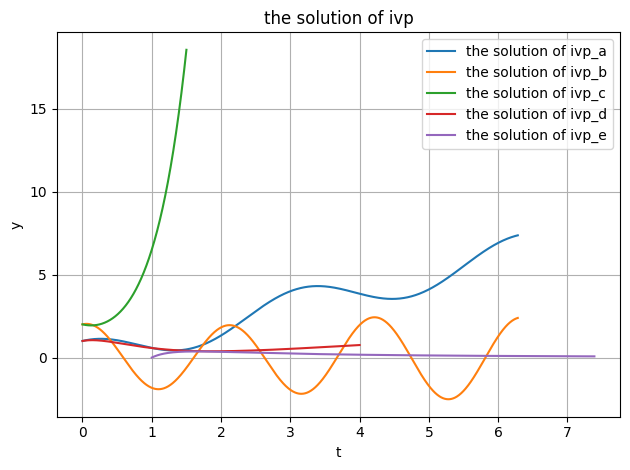

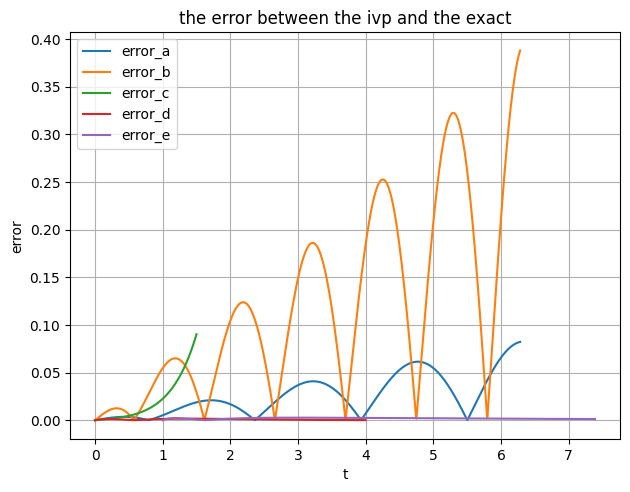

In [10]:
import matplotlib.pyplot as plt
import numpy as np


def euler(ivp, n):

    # 时间参数
    a, b = ivp["tspan"]
    h = (b - a) / n
    t = np.array([a + i * h for i in range(n + 1)])

    # 初始值
    u = np.full((n + 1, len(ivp["u0"])), ivp["u0"], dtype=float)

    # 迭代
    for i in range(n):
        u[i + 1] = u[i] + h * ivp["f"](u[i], t[i])

    return t, u


# 转化后的一阶微分方程
def f_a(u, t):
    y1, y2 = u
    return np.array([y2, 4 * t - 4 * y1])


def f_b(u, t):
    y1, y2 = u
    return np.array([y2, np.sin(2 * t) - 9 * y1])


def f_c(u, t):
    y1, y2 = u
    return np.array([y2, 4 * t + 4 * y1])


def f_d(u, t):
    y1, y2 = u
    return np.array([y2, t - 4 * y1 - 4 * y2])


def f_e(u, t):
    y1, y2 = u
    return np.array([y2, (-4 * y1 - 5 * t * y2) / (t**2)])


# 精确解
def exact_a(t):
    return t + np.cos(2 * t)


def exact_b(t):
    return 1 / 5 * np.sin(3 * t) + 2 * np.cos(3 * t) + 1 / 5 * np.sin(2 * t)


def exact_c(t):
    return np.exp(2 * t) + np.exp(-2 * t) - t


def exact_d(t):
    return (3 * t + 5 / 4) * np.exp(-2 * t) + (t - 1) / 4


def exact_e(t):
    return (2 / t**2) * np.log(t)


# ivp字典
ivp_a = {"tspan": (0, 2 * np.pi), "u0": (1, 1), "f": f_a}
ivp_b = {"tspan": (0, 2 * np.pi), "u0": (2, 1), "f": f_b}
ivp_c = {"tspan": (0, 1.5), "u0": (2, -1), "f": f_c}
ivp_d = {"tspan": (0, 4), "u0": (1, 3 / 4), "f": f_d}
ivp_e = {"tspan": (1, np.exp(2)), "u0": (0, 2), "f": f_e}

# ivp的解
ta, ua = euler(ivp_a, 1000)
tb, ub = euler(ivp_b, 1000)
tc, uc = euler(ivp_c, 1000)
td, ud = euler(ivp_d, 1000)
te, ue = euler(ivp_e, 1000)

# 绘图
plt.plot(ta, ua[:, 0], label="the solution of ivp_a")
plt.plot(tb, ub[:, 0], label="the solution of ivp_b")
plt.plot(tc, uc[:, 0], label="the solution of ivp_c")
plt.plot(td, ud[:, 0], label="the solution of ivp_d")
plt.plot(te, ue[:, 0], label="the solution of ivp_e")
plt.title("the solution of ivp")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 分量中的误差
error_a = abs(ua[:, 0] - exact_a(ta))
error_b = abs(ub[:, 0] - exact_b(tb))
error_c = abs(uc[:, 0] - exact_c(tc))
error_d = abs(ud[:, 0] - exact_d(td))
error_e = abs(ue[:, 0] - exact_e(te))

# 绘图
plt.plot(ta, error_a, label="error_a")
plt.plot(tb, error_b, label="error_b")
plt.plot(tc, error_c, label="error_c")
plt.plot(td, error_d, label="error_d")
plt.plot(te, error_e, label="error_e")
plt.legend()
plt.xlabel("t")
plt.ylabel("error")
plt.tight_layout()
plt.grid(True)
plt.title("the error between the ivp and the exact")
plt.show()


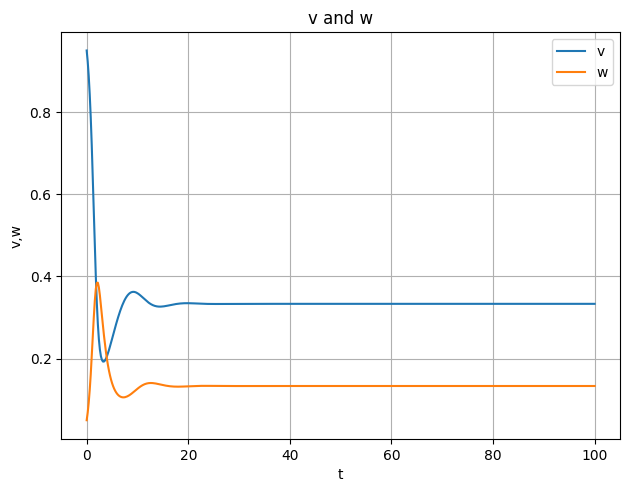

In [16]:
import matplotlib.pyplot as plt
import numpy as np


def euler(ivp, n):

    # 时间参数
    a, b = ivp["tspan"]
    h = (b - a) / n
    t = np.array([a + i * h for i in range(n + 1)])

    # 初始值
    u = np.full((n + 1, len(ivp["u0"])), ivp["u0"], dtype=float)

    # 迭代
    for i in range(n):
        u[i + 1] = u[i] + h * ivp["f"](u[i], t[i])

    return t, u


def fun(u, t):
    v, w = u
    return np.array([0.2 * (1 - v) - 3 * v * w, w * (3 * v - 1)])


# ivp
ivp = {"tspan": (0, 100), "u0": (0.95, 0.05), "f": fun}
# 求解
t, u = euler(ivp, 500)
# 绘图
plt.plot(t, u[:, 0], label="v")
plt.plot(t, u[:, 1], label="w")
plt.xlabel("t")
plt.ylabel("v,w")
plt.tight_layout()
plt.title("v and w")
plt.grid(True)
plt.legend()
plt.show()


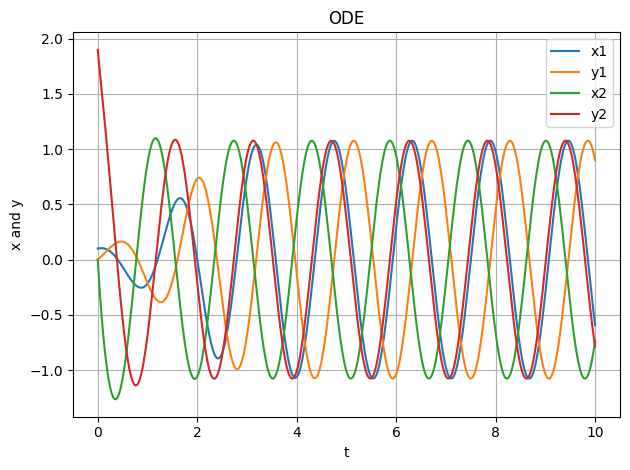

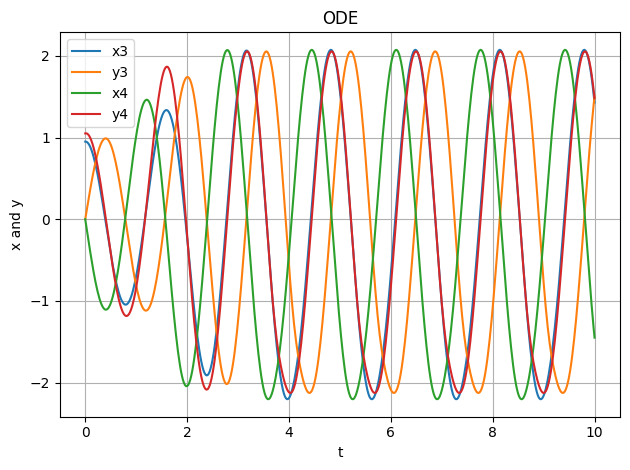

In [22]:
import matplotlib.pyplot as plt
import numpy as np


def euler(ivp, n):

    # 时间参数
    a, b = ivp["tspan"]
    h = (b - a) / n
    t = np.array([a + i * h for i in range(n + 1)])

    # 初始值
    u = np.full((n + 1, len(ivp["u0"])), ivp["u0"], dtype=float)

    # 迭代
    for i in range(n):
        u[i + 1] = u[i] + h * ivp["f"](u[i], t[i])

    return t, u


def fun(u, t):
    x, y = u
    return np.array([-4 * y + x * (1 - x**2 - y**2), 4 * x + y * (1 - x**2 - y**2)])


# ivp
ivp1 = {"tspan": (0, 10), "u0": (0.1, 0), "f": fun}
ivp2 = {"tspan": (0, 10), "u0": (0, 1.9), "f": fun}
# 求解
t1, u1 = euler(ivp1, 500)
t2, u2 = euler(ivp2, 500)
# 绘图
plt.plot(t1, u1[:, 0], label="x1")
plt.plot(t1, u1[:, 1], label="y1")
plt.plot(t2, u2[:, 0], label="x2")
plt.plot(t2, u2[:, 1], label="y2")
plt.title("ODE")
plt.grid(True)
plt.xlabel("t")
plt.ylabel("x and y")
plt.legend()
plt.tight_layout()
plt.show()


def fun2(u, t):
    x, y = u
    return np.array(
        [
            -4 * y - 1 / 4 * (1 - x**2 - y**2) * (4 - x**2 - y**2),
            4 * x - 1 / 4 * y * (1 - x**2 - y**2) * (4 - x**2 - y**2),
        ]
    )


# ivp
ivp3 = {"tspan": (0, 10), "u0": (0.95, 0), "f": fun2}
ivp4 = {"tspan": (0, 10), "u0": (0, 1.05), "f": fun2}
# 求解
t3, u3 = euler(ivp3, 500)
t4, u4 = euler(ivp4, 500)
# 绘图
plt.plot(t3, u3[:, 0], label="x3")
plt.plot(t3, u3[:, 1], label="y3")
plt.plot(t4, u4[:, 0], label="x4")
plt.plot(t4, u4[:, 1], label="y4")
plt.title("ODE")
plt.grid(True)
plt.xlabel("t")
plt.legend()
plt.ylabel("x and y")
plt.legend()
plt.tight_layout()
plt.show()


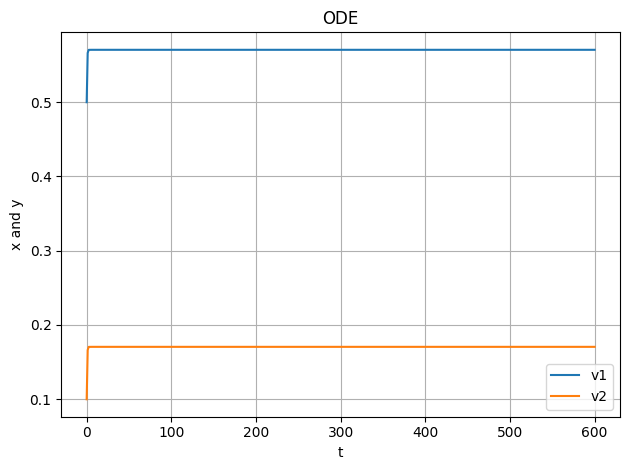

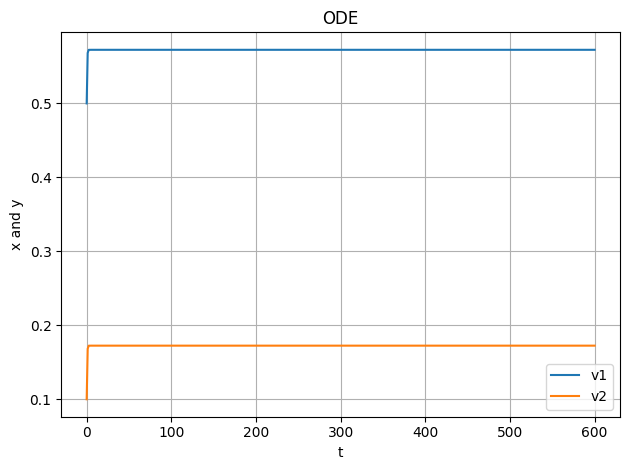

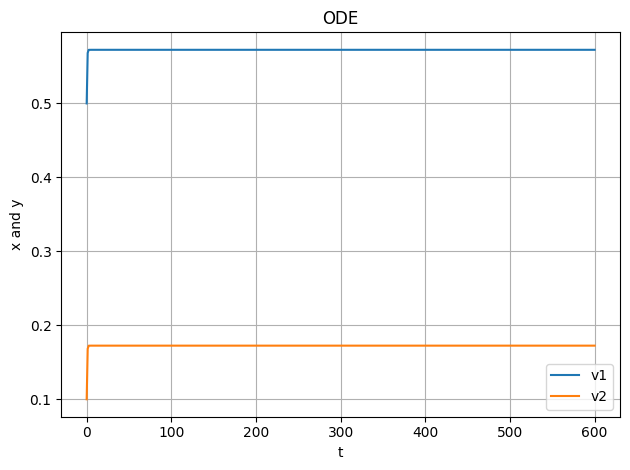

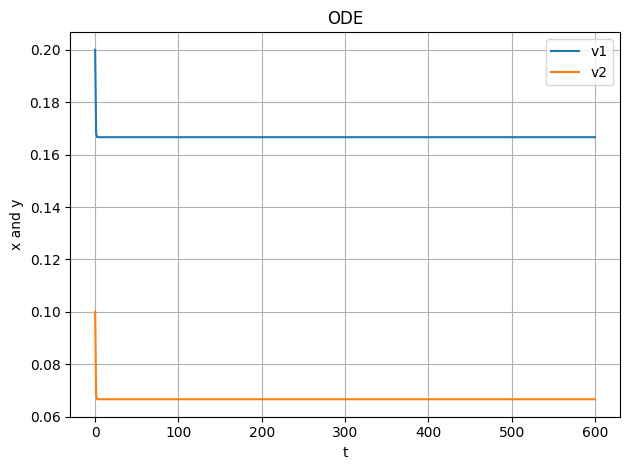

In [26]:
import matplotlib.pyplot as plt
import numpy as np


def euler(ivp, n):

    # 时间参数
    a, b = ivp["tspan"]
    h = (b - a) / n
    t = np.array([a + i * h for i in range(n + 1)])

    # 初始值
    u = np.full((n + 1, len(ivp["u0"])), ivp["u0"], dtype=float)

    # 迭代
    for i in range(n):
        u[i + 1] = u[i] + h * ivp["f"](u[i], t[i])

    return t, u


# 参数
a = 0.1
theta = 0.008
gama = 1
I = [0.05527, 0.05683, 0.0568385, 0.05740]


def fun1(u, t):
    v1, v2 = u
    return np.array([-v1 * (v1 - 1) * (v1 - a) - v2 + I[0]])


def fun2(u, t):
    v1, v2 = u
    return np.array([-v1 * (v1 - 1) * (v1 - a) - v2 + I[1]])


def fun3(u, t):
    v1, v2 = u
    return np.array([-v1 * (v1 - 1) * (v1 - a) - v2 + I[2]])


def fun4(u, t):
    v1, v2 = u
    return np.array([-v1 * (v1 - 1) * (v1 - a) - v2 + I[3]])


# ivp
ivp1 = {"tspan": (0, 600), "u0": (0.5, 0.1), "f": fun1}
ivp2 = {"tspan": (0, 600), "u0": (0.5, 0.1), "f": fun2}
ivp3 = {"tspan": (0, 600), "u0": (0.5, 0.1), "f": fun3}
ivp4 = {"tspan": (0, 600), "u0": (0.2, 0.1), "f": fun4}
# 求解
t1, u1 = euler(ivp1, 500)
t2, u2 = euler(ivp2, 500)
t3, u3 = euler(ivp3, 500)
t4, u4 = euler(ivp4, 500)
# 绘图
plt.plot(t1, u1[:, 0], label="v1")
plt.plot(t1, u1[:, 1], label="v2")
plt.title("ODE")
plt.grid(True)
plt.xlabel("t")
plt.ylabel("x and y")
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(t2, u2[:, 0], label="v1")
plt.plot(t2, u2[:, 1], label="v2")
plt.title("ODE")
plt.grid(True)
plt.xlabel("t")
plt.ylabel("x and y")
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(t3, u3[:, 0], label="v1")
plt.plot(t3, u3[:, 1], label="v2")
plt.title("ODE")
plt.grid(True)
plt.xlabel("t")
plt.ylabel("x and y")
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(t4, u4[:, 0], label="v1")
plt.plot(t4, u4[:, 1], label="v2")
plt.title("ODE")
plt.grid(True)
plt.xlabel("t")
plt.ylabel("x and y")
plt.legend()
plt.tight_layout()
plt.show()


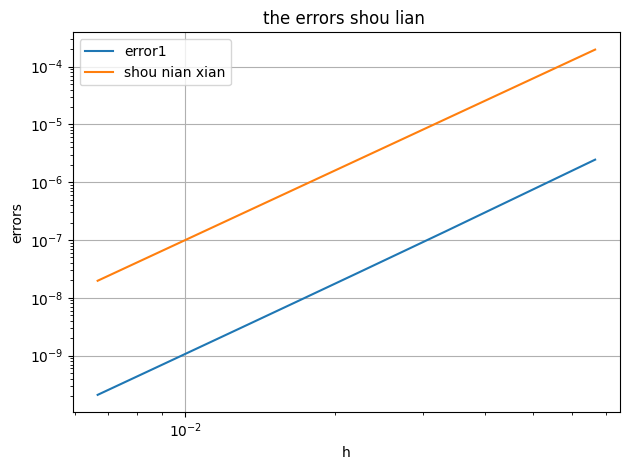

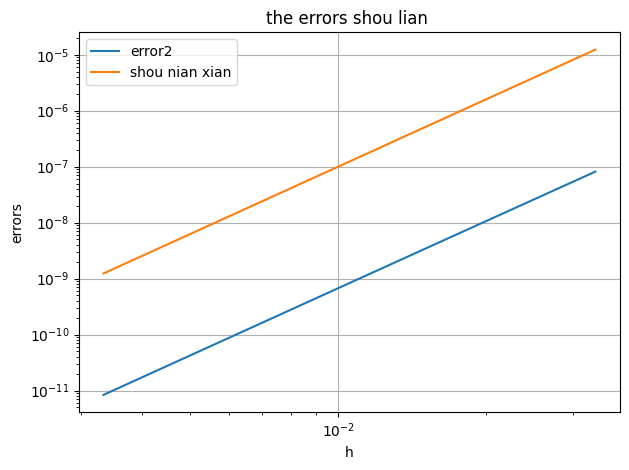

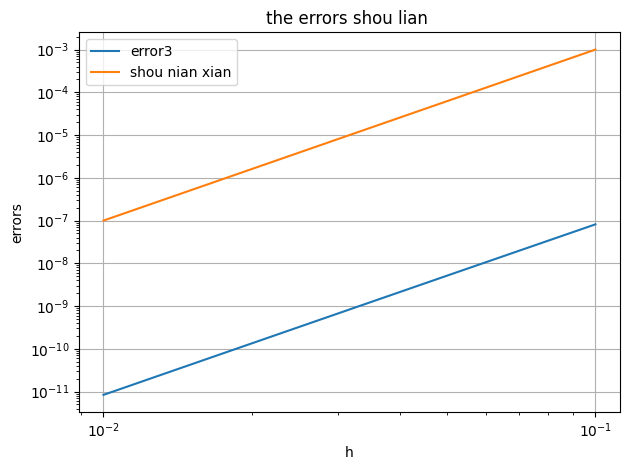

In [39]:
import matplotlib.pyplot as plt
import numpy as np


def rk4(ivp, n):

    # 时间离散化
    a, b = ivp["tspan"]
    h = (b - a) / n
    t = [a + i * h for i in range(n + 1)]  # 时间点数量

    # 初始化输出
    u = np.full(n + 1, float(ivp["u0"]))

    # 时间步长迭代
    for i in range(n):
        # 计算四个斜率值
        k1 = h * ivp["f"](u[i], t[i])
        k2 = h * ivp["f"](u[i] + k1 / 2, t[i] + h / 2)
        k3 = h * ivp["f"](u[i] + k2 / 2, t[i] + h / 2)
        k4 = h * ivp["f"](u[i] + k3, t[i] + h)

        # 计算下一步的解
        u[i + 1] = u[i] + (k1 + 2 * (k2 + k3) + k4) / 6

    return t, u


# 步长
n = [i for i in range(30, 330, 30)]


# 微分方程
def f_a(u, t):
    return -2 * t * u


def f_b(u, t):
    return u + t


def f_c(u, t):
    return t**2 / (1 + t**3) / u


# 精确解
def exact_a(t):
    return 2 * np.exp(-(t**2))


def exact_b(t):
    return -1 - t + 3 * np.exp(t)


def exact_c(t):
    return np.sqrt(1 + (2 / 3) * np.log(1 + t**3))


# ivp
ivp_a = {"tspan": (0, 2), "u0": 2, "f": f_a}
ivp_b = {"tspan": (0, 1), "u0": 2, "f": f_b}
ivp_c = {"tspan": (0, 3), "u0": 1, "f": f_c}
# 误差列表
errors_1 = []
errors_2 = []
errors_3 = []
# 求解
for i in n:
    t1, u1 = rk4(ivp_a, i)
    t2, u2 = rk4(ivp_b, i)
    t3, u3 = rk4(ivp_c, i)
    error1 = abs(u1[-1] - exact_a(t1[-1]))
    error2 = abs(u2[-1] - exact_b(t2[-1]))
    error3 = abs(u3[-1] - exact_c(t3[-1]))
    errors_1.append(error1)
    errors_2.append(error2)
    errors_3.append(error2)

# 步长的点集
hs_1 = 2 / np.array(n)
hs_2 = 1 / np.array(n)
hs_3 = 3 / np.array(n)

# 绘图
# (a)
plt.loglog(hs_1, errors_1, label="error1")
plt.loglog(hs_1, 10 * hs_1**4, label="shou nian xian")
plt.xlabel("h")
plt.ylabel("errors")
plt.legend()
plt.title("the errors shou lian ")
plt.tight_layout()
plt.grid(True)
plt.show()

# (b)
plt.loglog(hs_2, errors_2, label="error2")
plt.loglog(hs_2, 10 * hs_2**4, label="shou nian xian")
plt.xlabel("h")
plt.ylabel("errors")
plt.legend()
plt.title("the errors shou lian ")
plt.tight_layout()
plt.grid(True)
plt.show()

# (c)
plt.loglog(hs_3, errors_3, label="error3")
plt.loglog(hs_3, 10 * hs_3**4, label="shou nian xian")
plt.xlabel("h")
plt.ylabel("errors")
plt.legend()
plt.title("the errors shou lian ")
plt.tight_layout()
plt.grid(True)
plt.show()
